<b><h1 style="color:blue;">CONTEXT</h1><b><br/>

HHELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.Now,after raising $10 million,the CEO needs to decide on how the money should be utilised strategically so as to reach out to countries who are in the direst need of aid. <br/><br/>
    In this case study it is our task to categorize the countries using some socio-economic and health factors that determine the overall development of the country and so we use the<h1 style="color:green;">clustering algorithms</h1> to group countries according to their potential need of aid.<br/><br/>
    We will follow step by step approach from data importing to plotting the model and explore the basics of data science!

 <b>GDP tells us whether the economy is expanding by producing more goods and services, or contracting due to less output.</b><br>
 C is Personal Consumption Expenditures	Also known as consumer spending, or the tally of all goods and services that consumers buy—from grocery items to health care coverage.
I is Gross Private Investment	Includes business spending on fixed assets such as machinery, equipment and buildings, plus inventory investment; also incorporates consumers’ home purchases.
G is Government Purchases	Comprises federal, state and local government spending for the provisioning of goods and services—from schools and roads to national defense.
X-M is Exports minus Imports	Or, net exports: the value of exports to other countries minus the value of imports into the U.S. (The dollar value of imports is subtracted to ensure that only spending on domestic goods is measured in GDP.)

In [289]:
import numpy as np
import pandas as pd

In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
# Use pandas to read a csv file by prodiving the path of file to read_csv() function
# Many other formats are available e.g read_excel(), read_table(), read_json etc. 
# these options can be seen using dot tab option
# The output of read_csv function here is stored as a DataFrame
Data=pd.read_csv(filepath_or_buffer="D:\Data Scienece\IVY PRO\Python\Python Datasets\Python Datasets\external\country\CountryData.csv"
, 
                              sep=',', encoding='latin-1')

# Controlling data display options
pd.options.display.max_columns=30
pd.set_option('max_rows',2000)
print('Shape before deleting duplicate values:', Data.shape)

# Removing duplicate rows if any
Data=Data.drop_duplicates()
print('Shape After deleting duplicate values:', Data.shape)

# Printing few records of the data
Data.sample(n=30,random_state=40)

Shape before deleting duplicate values: (167, 10)
Shape After deleting duplicate values: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300
152,Tunisia,17.4,50.50,6.21,55.3,10400,3.820,76.9,2.14,4140
140,Sri Lanka,11.2,19.60,2.94,26.8,8560,22.800,74.4,2.20,2810
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
53,Finland,3.0,38.70,8.95,37.4,39800,0.351,80.0,1.87,46200
119,Peru,20.3,27.80,5.08,23.8,9960,5.710,77.9,2.54,5020
100,Mauritius,15.0,51.20,6.00,62.2,15900,1.130,73.4,1.57,8000
46,Ecuador,25.1,27.90,8.06,32.4,9350,7.470,76.7,2.66,4660


In [292]:
Data.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [293]:
Data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:>

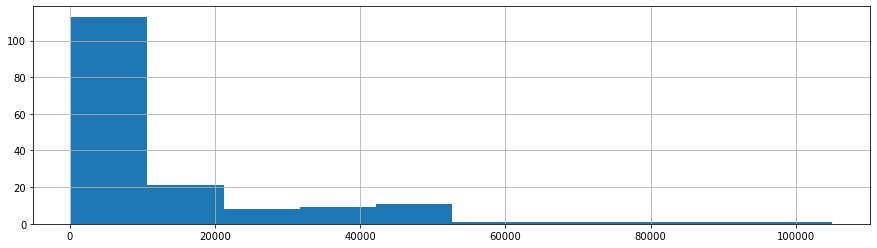

In [294]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
Data['gdpp'].hist(figsize=(15,4))

array([[<AxesSubplot:title={'center':'child_mort'}>,
        <AxesSubplot:title={'center':'exports'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'imports'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'inflation'}>],
       [<AxesSubplot:title={'center':'life_expec'}>,
        <AxesSubplot:title={'center':'total_fer'}>,
        <AxesSubplot:title={'center':'gdpp'}>]], dtype=object)

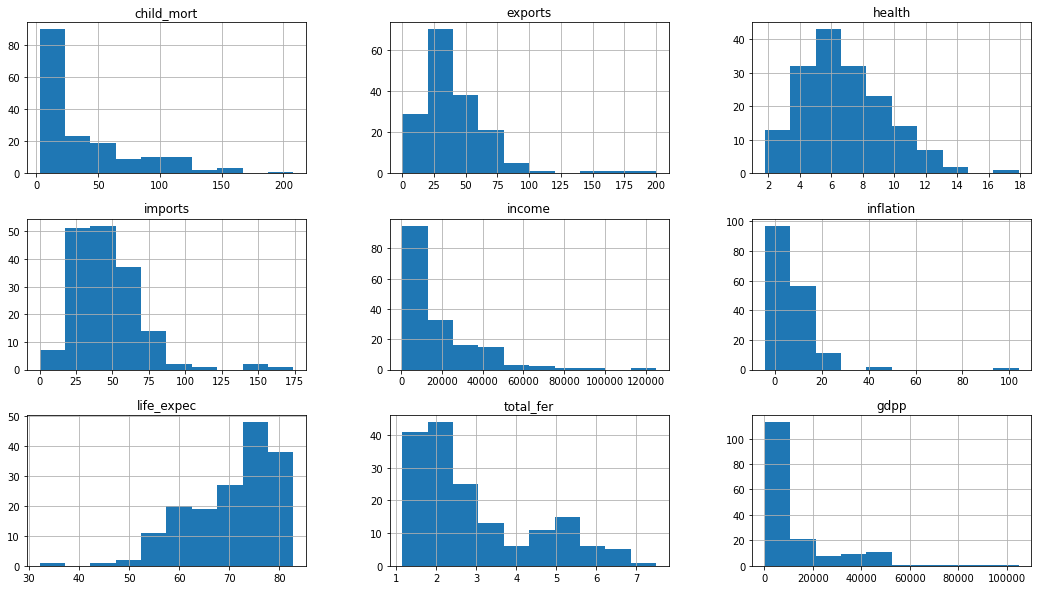

In [295]:
Data.hist(['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], figsize=(18,10))

In [296]:
Data['child_mort'][Data['child_mort']<150].sort_values(ascending=False)

31     149.0
97     137.0
113    130.0
112    123.0
3      119.0
37     116.0
25     116.0
64     114.0
40     111.0
49     111.0
17     111.0
63     109.0
28     108.0
106    101.0
87      99.7
99      97.4
26      93.6
116     92.1
94      90.5
150     90.3
0       90.2
88      89.3
36      88.2
166     83.1
155     81.0
56      80.3
84      78.9
142     76.7
59      74.7
147     71.9
129     66.8
107     64.4
38      63.9
55      63.7
126     63.6
81      62.7
149     62.6
80      62.2
93      62.2
154     62.0
69      58.8
165     56.3
108     56.0
50      55.2
137     53.7
21      52.5
146     52.4
12      49.4
109     47.0
19      46.6
27      44.4
18      42.7
101     40.0
9       39.2
65      37.6
72      36.9
161     36.3
62      35.4
45      34.4
105     33.5
70      33.3
120     31.9
83      29.6
162     29.2
47      29.1
136     28.1
2       27.3
30      26.5
103     26.1
46      25.1
52      24.1
143     24.1
118     24.1
164     23.3
79      21.5
78      21.1
141     20.7

In [297]:
Data['child_mort'][Data['child_mort']>150]=149

In [298]:
Data['exports'][Data['exports']<125].sort_values(ascending=False)

73     103.000
131     93.800
95      86.900
49      85.800
38      85.100
67      81.800
157     77.700
96      77.600
15      76.400
154     76.300
134     76.300
51      75.100
110     72.000
164     72.000
117     70.000
11      69.500
23      67.400
82      66.700
148     66.500
43      66.000
115     65.700
89      65.600
90      65.300
135     64.300
145     64.000
3       62.300
123     62.300
16      58.200
52      57.800
55      57.700
118     55.100
9       54.300
27      54.100
85      53.700
68      53.400
143     52.500
83      51.600
65      51.400
14      51.400
8       51.300
100     51.200
99      50.700
40      50.600
44      50.500
152     50.500
24      50.200
42      50.200
128     49.600
138     49.400
136     49.300
78      48.300
108     47.800
156     47.100
103     46.700
162     46.600
144     46.200
4       45.500
79      44.200
21      43.600
18      42.500
58      42.300
19      41.200
37      41.100
150     40.200
121     40.100
92      39.800
114     39

In [299]:
Data['exports'][Data['exports']>125]=103

In [300]:
Data['health'][Data['health']<14].sort_values(ascending=False)

132    13.10
54     11.90
110    11.90
88     11.80
102    11.70
58     11.60
26     11.60
145    11.50
44     11.40
29     11.30
81     11.30
20     11.10
87     11.10
8      11.00
122    11.00
39     10.90
15     10.70
126    10.50
130    10.40
60     10.30
111    10.10
57     10.10
158     9.64
144     9.63
139     9.54
75      9.53
77      9.49
114     9.48
135     9.41
68      9.40
73      9.19
149     9.12
104     9.11
155     9.01
22      9.01
53      8.95
137     8.94
134     8.79
7       8.73
98      8.65
136     8.55
64      8.50
72      8.41
160     8.35
21      8.30
5       8.10
117     8.10
46      8.06
78      8.04
13      7.97
33      7.96
37      7.91
10      7.89
43      7.88
91      7.77
41      7.76
156     7.72
150     7.65
74      7.63
35      7.59
0       7.58
121     7.46
67      7.33
92      7.09
90      7.04
86      7.03
143     7.01
138     6.93
66      6.91
48      6.91
24      6.87
62      6.85
164     6.84
108     6.78
153     6.74
25      6.74
85      6.68

In [301]:
Data['health'][Data['health']>14]=13

In [302]:
Data['imports'][Data['imports']<125].sort_values(ascending=False)

131    108.0000
87     101.0000
88      92.6000
73      86.5000
83      81.7000
136     81.2000
101     81.0000
164     80.2000
81      79.9000
65      79.1000
102     78.5000
117     78.2000
134     77.8000
67      76.5000
15      74.7000
95      71.0000
18      70.7000
78      69.0000
51      68.7000
90      67.2000
96      65.4000
66      64.7000
14      64.5000
52      63.9000
157     63.6000
110     63.6000
43      62.9000
135     62.9000
104     62.7000
100     62.2000
30      61.8000
99      61.2000
148     60.8000
108     60.7000
151     60.3000
86      60.2000
27      59.5000
49      58.9000
4       58.9000
146     58.6000
92      58.1000
42      57.5000
16      57.5000
150     57.3000
141     57.1000
103     56.7000
152     55.3000
85      55.1000
38      54.7000
145     53.3000
127     53.1000
24      53.0000
57      52.8000
162     52.7000
36      51.7000
118     51.5000
20      51.3000
21      51.3000
156     51.1000
11      50.9000
76      49.6000
37      49.6000
84      

In [303]:
Data['imports'][Data['imports']>125]=108

In [304]:
Data['income'][Data['income']<100000].sort_values(ascending=False)

91     91700
23     80600
82     75200
133    72100
114    62300
157    57600
145    55500
159    49400
73     45700
110    45500
128    45400
115    45300
44     44000
8      43200
144    42900
7      41400
15     41100
11     41100
29     40700
58     40400
53     39800
68     38800
54     36900
158    36200
75     36200
77     35800
42     33900
49     33700
139    32500
111    32300
138    30400
89     29600
74     29600
135    28700
60     28700
43     28300
98     28300
122    27200
134    25200
125    23100
10     22900
51     22700
67     22300
121    21800
95     21100
90     21100
131    20400
79     20100
41     20100
33     19400
4      19100
5      18700
85     18300
153    18000
124    17800
71     17400
160    17100
163    16500
86     16300
14     16200
9      16000
100    15900
117    15400
55     15400
24     15300
13     15300
22     14500
143    14200
104    14000
148    13500
21     13300
39     13000
2      12900
130    12700
72     12700
137    12000
92     11400

In [305]:
Data['income'][Data['income']>100000]=91700

In [306]:
Data['inflation'][Data['inflation']<30].sort_values(ascending=False)

149    26.500
49     24.900
165    23.600
140    22.800
3      22.400
5      20.900
37     20.800
38     20.700
142    19.600
79     19.500
99     18.900
132    17.200
128    17.200
23     16.700
59     16.600
72     16.600
55     16.600
161    16.500
2      16.100
63     16.100
71     15.900
115    15.600
70     15.300
109    15.100
14     15.100
125    14.200
89     14.200
166    14.000
9      13.800
156    13.400
146    12.500
157    12.500
26     12.300
94     12.100
164    12.100
50     11.600
82     11.200
102    11.100
116    10.900
155    10.600
47     10.100
83     10.000
76      9.810
0       9.440
147     9.250
84      9.200
69      8.980
33      8.960
21      8.920
93      8.790
19      8.780
57      8.550
78      8.430
22      8.410
6       7.770
106     7.640
46      7.470
11      7.440
95      7.270
143     7.200
12      7.140
107     7.040
153     7.010
123     6.980
34      6.940
136     6.810
25      6.810
39      6.570
32      6.390
137     6.350
118     6.100
18    

In [307]:
Data['inflation'][Data['inflation']>30]=26

In [308]:
Data['life_expec'][Data['life_expec']>40].sort_values(ascending=True)

87     46.5
31     47.5
166    52.0
94     53.1
137    54.3
106    54.5
132    55.0
64     55.6
0      56.2
40     56.3
32     56.5
155    56.8
21     57.1
28     57.3
37     57.5
26     57.7
25     57.9
63     58.0
108    58.6
150    58.7
112    58.8
147    59.3
97     59.5
3      60.1
38     60.4
113    60.5
81     60.7
93     60.8
88     60.8
49     60.9
136    61.7
50     61.7
17     61.8
59     62.2
80     62.8
55     62.9
162    63.0
84     63.8
129    64.0
126    64.6
116    65.3
52     65.3
101    65.4
65     65.5
56     65.5
36     65.9
27     66.1
69     66.2
103    66.2
142    66.3
107    66.8
72     67.2
165    67.5
154    67.9
99     68.2
109    68.3
79     68.4
83     68.5
161    68.8
120    69.0
9      69.1
125    69.2
146    69.6
102    69.7
151    69.9
70     69.9
143    70.3
14     70.4
156    70.4
12     70.4
47     70.5
149    71.1
61     71.3
62     71.3
16     71.4
127    71.5
141    71.6
19     71.6
18     72.1
30     72.5
57     72.8
164    73.1
85     73.1
90  

In [309]:
Data['life_expec'][Data['life_expec']<40]=46.5

In [310]:
Data['gdpp'][Data['gdpp']<60000].sort_values(ascending=False)

44     58000
144    52100
7      51900
110    50300
73     48700
159    48400
29     47400
8      46900
133    46600
53     46200
77     44500
15     44400
68     41900
58     41800
54     40600
158    38900
82     38500
75     35800
23     35300
157    35000
111    33700
42     30800
139    30700
74     30600
10     28000
60     26900
135    23400
122    22500
138    22100
98     21100
11     20700
43     19800
128    19300
115    19300
49     17100
134    16600
13     16000
51     14600
41     13500
163    13500
67     13100
33     12900
121    12600
4      12200
89     12100
90     12000
160    11900
85     11300
22     11200
131    10800
125    10700
153    10700
5      10300
79      9070
95      9070
86      8860
55      8750
143     8300
124     8230
39      8200
117     8080
100     8000
61      7370
137     7280
96      7100
24      6840
104     6680
71      6530
21      6350
35      6250
141     6230
14      6030
9       5840
45      5450
130     5410
108     5190
148     5080

In [311]:
Data['gdpp'][Data['gdpp']>60000]=58000

array([[<AxesSubplot:title={'center':'child_mort'}>,
        <AxesSubplot:title={'center':'exports'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'imports'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'inflation'}>],
       [<AxesSubplot:title={'center':'life_expec'}>,
        <AxesSubplot:title={'center':'total_fer'}>,
        <AxesSubplot:title={'center':'gdpp'}>]], dtype=object)

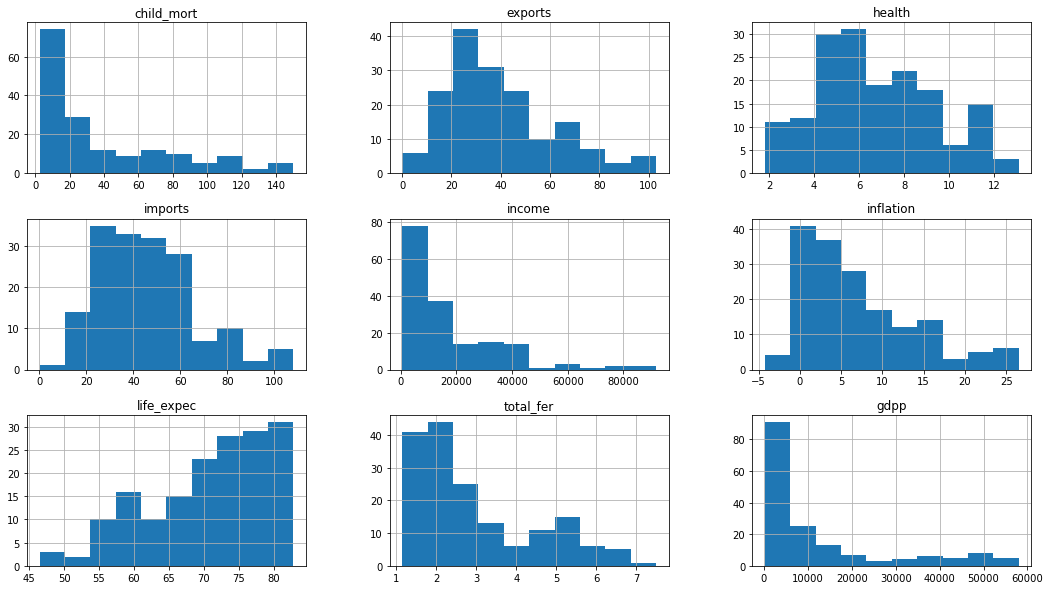

In [312]:
Data.hist(['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], figsize=(18,10))

In [313]:
Data.sample(n=10,random_state=40)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
152,Tunisia,17.4,50.5,6.21,55.3,10400,3.820,76.9,2.14,4140
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.800,74.4,2.20,2810
66,Haiti,149.0,15.3,6.91,64.7,1500,5.450,46.5,3.33,662
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
119,Peru,20.3,27.8,5.08,23.8,9960,5.710,77.9,2.54,5020
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000
46,Ecuador,25.1,27.9,8.06,32.4,9350,7.470,76.7,2.66,4660


In [314]:
Data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<b>K-Means Clustering </b>

In [315]:
# Keeping the target variable for future reference
TargetVariable=Data['country']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=Data.drop(['country'], axis=1)

OnlyPredictors.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [316]:
# Taking out only the Predictor variables
#y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:5])

[[9.02e+01 1.00e+01 7.58e+00 4.49e+01 1.61e+03 9.44e+00 5.62e+01 5.82e+00
  5.53e+02]
 [1.66e+01 2.80e+01 6.55e+00 4.86e+01 9.93e+03 4.49e+00 7.63e+01 1.65e+00
  4.09e+03]
 [2.73e+01 3.84e+01 4.17e+00 3.14e+01 1.29e+04 1.61e+01 7.65e+01 2.89e+00
  4.46e+03]
 [1.19e+02 6.23e+01 2.85e+00 4.29e+01 5.90e+03 2.24e+01 6.01e+01 6.16e+00
  3.53e+03]
 [1.03e+01 4.55e+01 6.03e+00 5.89e+01 1.91e+04 1.44e+00 7.68e+01 2.13e+00
  1.22e+04]]


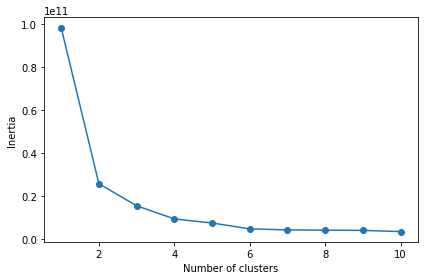

In [317]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

In [318]:
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=4, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [319]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[1 1 3 1 3 3 1 0 2 3 2 2 1 3 3 2 1 1 1 1 1 3 3 0 3 1 1 1 1 2 1 1 1 3 1 3 1
 1 1 3 1 3 2 2 0 3 1 1 1 2 1 3 1 2 2 3 1 1 2 1 2 3 1 1 1 1 1 3 2 1 1 3 3 0
 2 2 1 2 1 3 1 1 0 1 1 3 3 1 1 3 3 0 3 1 1 3 3 1 2 1 3 1 1 1 3 1 1 1 1 1 0
 2 1 1 0 2 1 3 1 1 1 3 2 0 3 3 1 1 2 1 3 3 1 0 3 2 1 3 2 2 1 1 1 3 0 0 1 1
 3 1 1 1 1 3 1 1 1 0 2 0 3 1 1 3 1 1 1]
Inertia: 10766181767.160656


In [320]:
Data['PredictedClusterID']=predictedCluster
Data.sample(n=15,
    frac=None,
    replace=False,
    weights=None,
    random_state=5,
    axis=0)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PredictedClusterID
71,Iran,19.3,24.40,5.60,19.4,17400,15.90,74.5,1.76,6530,3
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
54,France,4.2,26.80,11.90,28.1,36900,1.05,81.4,2.03,40600,2
56,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562,1
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.39,56.3,5.27,1220,1
147,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350,3
42,Cyprus,3.6,50.20,5.97,57.5,33900,2.01,79.9,1.42,30800,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
127,Samoa,18.9,29.20,6.47,53.1,5400,1.72,71.5,4.34,3450,1


No handles with labels found to put in legend.


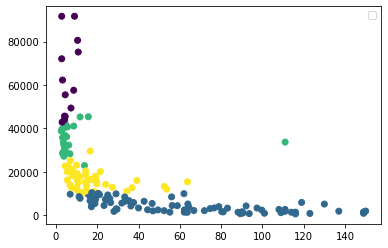

In [321]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=Data['child_mort'], y=Data['income'], c=Data['PredictedClusterID'])
plt.legend()

No handles with labels found to put in legend.


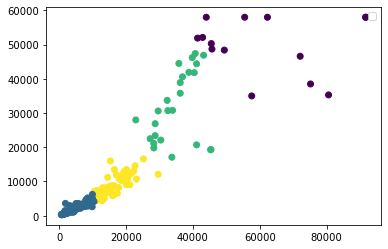

In [322]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=Data['income'], y=Data['gdpp'], c=Data['PredictedClusterID'])
plt.legend()

No handles with labels found to put in legend.


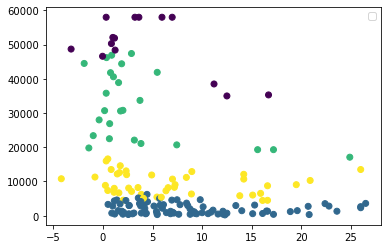

In [324]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=Data['inflation'], y=Data['gdpp'], c=Data['PredictedClusterID'])
plt.legend()

In [340]:
condition1 = Data['PredictedClusterID']==0
Results=Data[condition1]
print("Number of countries are: ", len(Results))
print("max gdpp value:",max(Results['gdpp']))
print("min gdpp value:",min(Results['gdpp']))
print("average gdpp value :",round((Results['gdpp'].sum())/len(Results),2))
Results


Number of countries are:  14
max gdpp value: 58000
min gdpp value: 35000
average gdpp value : 49771.43


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PredictedClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,0
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,0
91,Luxembourg,2.8,103.0,7.77,108.0,91700,3.620,81.3,1.63,58000,0
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,0
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,58000,0
123,Qatar,9.0,62.3,1.81,23.8,91700,6.980,79.5,2.07,58000,0
133,Singapore,2.8,103.0,3.96,108.0,72100,-0.046,82.7,1.15,46600,0


In [341]:
condition1 = Data['PredictedClusterID']==1
Results=Data[condition1]
print("Number of countries are: ", len(Results))
print("max gdpp value:",max(Results['gdpp']))
print("min gdpp value:",min(Results['gdpp']))
print("average gdpp value :",round((Results['gdpp'].sum())/len(Results),2))
Results

Number of countries are:  85
max gdpp value: 6230
min gdpp value: 231
average gdpp value : 1998.16


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PredictedClusterID
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,1
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,1
16,Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1
18,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,1
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,1
20,Bosnia and Herzegovina,6.9,29.700,11.10,51.3000,9720,1.400,76.8,1.31,4610,1


In [342]:
condition1 = Data['PredictedClusterID']==2
Results=Data[condition1]
print("Number of countries are: ", len(Results))
print("max gdpp value:",max(Results['gdpp']))
print("min gdpp value:",min(Results['gdpp']))
print("average gdpp value :",round((Results['gdpp'].sum())/len(Results),2))
Results

Number of countries are:  25
max gdpp value: 47400
min gdpp value: 17100
average gdpp value : 31776.0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PredictedClusterID
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2


In [344]:
condition1 = Data['PredictedClusterID']==3
Results=Data[condition1]
print("Number of countries are: ", len(Results))
print("max gdpp value:",max(Results['gdpp']))
print("min gdpp value:",min(Results['gdpp']))
print("average gdpp value :",round((Results['gdpp'].sum())/len(Results),2))
Results

Number of countries are:  43
max gdpp value: 16600
min gdpp value: 4460
average gdpp value : 9262.09


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PredictedClusterID
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,3
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,3
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,3
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,3
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,3
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,3
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,3


In [ ]:
1,   1,998 #these countries needs the aid most.
3,   9,262
2,  31,776
0,  49,771

In [345]:
print(43+25+85+14)

167


## Hierarchical Clustering

In [387]:
# Keeping the target variable for future reference
#TargetVariable=Data['country']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=Data.drop(['country','PredictedClusterID','PredictedClusterIDhier','PredictedClusterIDDB'], axis=1)

OnlyPredictors.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [388]:
# Taking out only the Predictor variables
#y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:5])

[[9.02e+01 1.00e+01 7.58e+00 4.49e+01 1.61e+03 9.44e+00 5.62e+01 5.82e+00
  5.53e+02]
 [1.66e+01 2.80e+01 6.55e+00 4.86e+01 9.93e+03 4.49e+00 7.63e+01 1.65e+00
  4.09e+03]
 [2.73e+01 3.84e+01 4.17e+00 3.14e+01 1.29e+04 1.61e+01 7.65e+01 2.89e+00
  4.46e+03]
 [1.19e+02 6.23e+01 2.85e+00 4.29e+01 5.90e+03 2.24e+01 6.01e+01 6.16e+00
  3.53e+03]
 [1.03e+01 4.55e+01 6.03e+00 5.89e+01 1.91e+04 1.44e+00 7.68e+01 2.13e+00
  1.22e+04]]


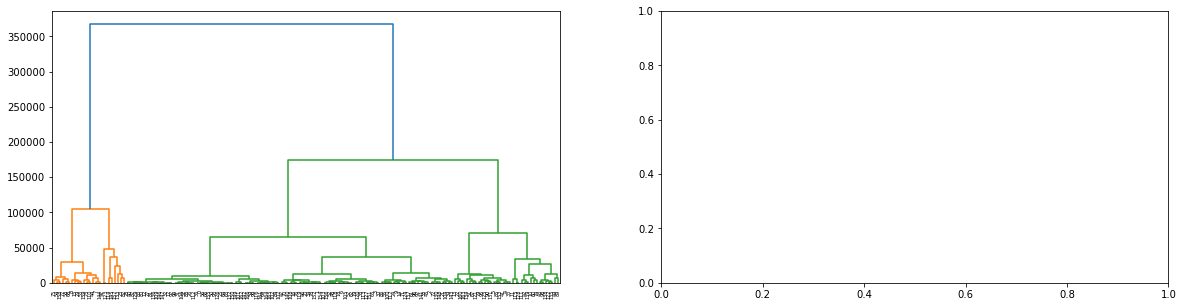

In [389]:
# Hierarchical Clustering
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])

            country  child_mort  exports  health  imports  income  inflation  \
97             Mali       137.0     22.8    4.98     35.1    1870       4.37   
68          Iceland         2.6     53.4    9.40     43.3   38800       5.47   
23           Brunei        10.5     67.4    2.84     28.0   80600      16.70   
127           Samoa        18.9     29.2    6.47     53.1    5400       1.72   
158  United Kingdom         5.2     28.2    9.64     30.8   36200       1.57   
29           Canada         5.6     29.1   11.30     31.0   40700       2.87   
102         Moldova        17.2     39.2   11.70     78.5    3910      11.10   
59            Ghana        74.7     29.5    5.22     45.9    3060      16.60   
95         Malaysia         7.9     86.9    4.39     71.0   21100       7.27   
62        Guatemala        35.4     25.8    6.85     36.3    6710       5.14   

     life_expec  total_fer   gdpp  PredictedClusterID  PredictedClusterIDhier  \
97         59.5       6.55    708     

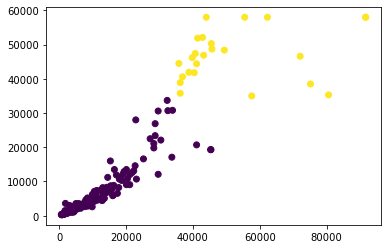

In [390]:
# Creating 4 Clusters Based on the above dendogram visually
# Bottom-Up hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
Data['PredictedClusterIDhier']=hc.fit_predict(X)
print(Data.sample(n=10,random_state=61))
 
# Plotting the predicted clusters
plt.scatter(x=Data['income'], y=Data['gdpp'], c=Data['PredictedClusterIDhier'])

# Use of Linkage
# "ward" minimizes the variance of the clusters being merged.
# "average" uses the average of the distances of each observation of the two sets.
# "complete" or maximum linkage uses the maximum distances between all observations of the two sets.

### Finding Best number of clusters for Hierarchical Clustering using Silhouette Coefficient

In [380]:
## Finding Optimal Number of clusters using silhouette score
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:
   
        
    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'ward')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))

In [381]:
silhouette_scores_data

,score,Clusters
0,0.716629,2
0,0.610315,3
0,0.611648,4
0,0.535022,5
0,0.502558,6
0,0.505845,7
0,0.506979,8
0,0.536171,9


In [382]:
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,Clusters
0,0.716629,2


its forming 2 distinct clusters

#<b>DBSCAN</b>

In [383]:
# Keeping the target variable for future reference
#TargetVariable=Data['country']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=Data.drop(['country','PredictedClusterID','PredictedClusterIDhier','PredictedClusterIDDB'], axis=1)

OnlyPredictors.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  PredictedClusterID  \
0       9.44        56.2       5.82    553                   2   
1       4.49        76.3       1.65   4090                   2   
2      16.10        76.5       2.89   4460                   2   
3      22.40        60.1       6.16   3530                   2   
4       1.44        76.8       2.13  12200                   0   

   PredictedClusterIDhier  PredictedClusterIDDB  
0                       0                    -1  
1                       0                    -1  
2                   

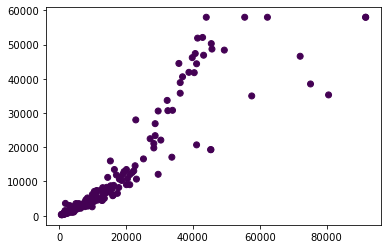

In [384]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.02, min_samples=2)

# Generating cluster id for each row using DBSCAN algorithm
# -1 indicates the point is a noize, and does not belong to any cluster
# DBSCAN automatically chooses the number of clusters based on eps and min_samples
Data['PredictedClusterIDDB']=db.fit_predict(X)
print(Data.head())


# Plotting the predicted clusters
plt.scatter(x=Data['income'], y=Data['gdpp'], c=Data['PredictedClusterIDDB'])


# eps : float, optional
#    The maximum distance between two samples for them to be considered
#    as in the same neighborhood.

# min_samples : int, optional
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.

In [385]:
## Finding best values of eps and min_samples
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], 
                                                                          columns=["score", "parameters"]))

In [386]:
silhouette_scores_data

""


it fails to cluster

In [373]:
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

KeyError: 'score'